In [256]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] ='AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False


In [257]:
df = pd.read_csv('./proj-yeardream_filtered3.csv')

In [258]:
df_payment = df[df['유형'] == 'PAYMENT']
df_payment.head()

,Unnamed: 0,거래ID,유형,고객ID,코스ID,사이트,포맷,카테고리,코스이름,거래일자,...,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,연,월,일,시
0,0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,...,189000,TRANSFER,159000,0,159000,0,2022,12,31,22
1,1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,...,501000,TRANSFER,501000,0,501000,0,2022,12,30,18
2,2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,...,549000,CARD,549000,0,549000,0,2022,12,31,23
3,3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,...,165000,CARD,135000,30000,135000,0,2022,12,31,23
4,4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,...,239000,CARD,239000,0,239000,0,2022,12,31,23


In [259]:
sales = df_payment.groupby(by='카테고리')['판매가격'].sum()

In [260]:
coupon_dc = df_payment.groupby(by='카테고리')['쿠폰할인액'].sum()

In [261]:
df_nested = pd.DataFrame({'판매가격': sales, '쿠폰할인액': coupon_dc, '현금지불': sales-coupon_dc,
            '쿠폰비중': coupon_dc/sales, '현금비중': 1-coupon_dc/sales})
df_nested

,판매가격,쿠폰할인액,현금지불,쿠폰비중,현금비중
카테고리,,,,,
데이터 사이언스,6361360060,1592232390,4769127670,0.250297,0.749703
디자인,1999351800,496571980,1502779820,0.248366,0.751634
마케팅,2342170000,528389756,1813780244,0.225598,0.774402
부동산/금융,2794815300,470743600,2324071700,0.168435,0.831565
부업/창업,196101000,87605900,108495100,0.446739,0.553261
업무 생산성,2139591700,510555145,1629036555,0.238623,0.761377
영상/3D,2816592000,644673700,2171918300,0.228884,0.771116
일러스트,2980035370,650357765,2329677605,0.218238,0.781762
투자/재테크,769069500,291621450,477448050,0.379187,0.620813


## 카테고리별 판매가격 -> 쿠폰할인액, 현금지불로 나눔
- 월별 실거래금액 합
- 유형:PAYMENT로 소팅했기 때문에 환불금액은 제외되어 있음

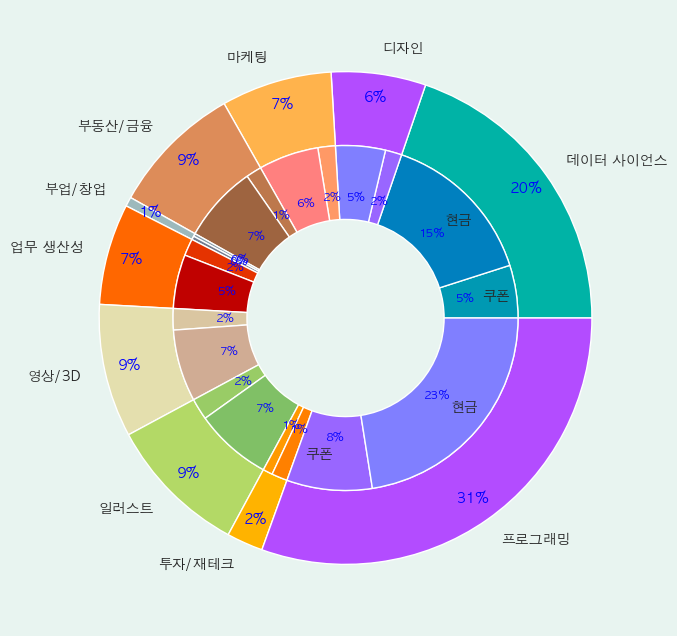

In [262]:

import matplotlib.pyplot as plt

a,b,c,d,e,f,g,h,i,j = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink,
                     plt.cm.summer, plt.cm.autumn, plt.cm.cool]
outer_colors = [a(.7), b(.7), c(.7), d(.7), e(.7), f(.7), g(.7), h(.7), i(.7), j(.7)]
inner_colors = [a(.6), a(.5), 
                b(.6), b(.5),
                c(.6), c(.5),
                d(.6), d(.5),
                e(.6), e(.5),
                f(.6), f(.5),
                g(.6), g(.5),
                h(.6), h(.5),
                i(.6), i(.5),
                j(.6), j(.5),
                ]
    
fig, ax = plt.subplots(figsize=(8,8), facecolor='#e8f4f0')
font_color = '#525252'

wedges, texts, autotexts = ax.pie(df_nested['판매가격'], 
                                   labels=df_nested.index,
                                   colors=outer_colors, 
                                   autopct='%1.0f%%', 
                                   pctdistance=0.9, 
                                   wedgeprops=dict(width=0.3))

# autotexts는 autopct에 의해 생성된 텍스트의 목록입니다.
plt.setp(autotexts, size=10, weight="bold", color="blue")

# texts는 labels에 의해 생성된 텍스트의 목록입니다.
plt.setp(texts, size=10, weight="bold")

# inner circle 설정
inner_values = df_nested[['쿠폰할인액', '현금지불']].values.flatten()
inner_labels = ['쿠폰','현금','','','','','','','','','','','','','','','','','쿠폰','현금']
# inner_labels = []
# for i in range(0,20):
#        if i % 2 == 0: inner_labels.append('쿠폰')
#        elif i % 2 == 1: inner_labels.append(' ')

wedges2, texts2, autotexts2 = ax.pie(inner_values,
                                   labels = inner_labels,
                                   labeldistance = 0.8,
                                   autopct='%1.0f%%',
                                   pctdistance=0.7,
                                   radius=1-0.3, 
                                   colors=inner_colors,
                                   wedgeprops=dict(width=0.3))
plt.setp(autotexts2, size=8, color="blue")
plt.setp(texts2, size=10)

plt.show()

In [263]:
df_payment_coupon = df_payment[df_payment['쿠폰할인액'] > 0]

coupon_count = df_payment_coupon['카테고리'].value_counts()
pay_count = df_payment['카테고리'].value_counts()
pay_count
type(coupon_count)

pandas.core.series.Series

In [264]:
df_category = pd.DataFrame({'쿠폰사용구매건': coupon_count, '일반구매건': pay_count,
                            '합계': coupon_count+pay_count, '쿠폰비중': coupon_count/pay_count,
                            '일반비중': 1-(coupon_count/pay_count)})
df_category

,쿠폰사용구매건,일반구매건,합계,쿠폰비중,일반비중
카테고리,,,,,
데이터 사이언스,12433,24867,37300,0.499980,0.500020
디자인,4928,9396,14324,0.524479,0.475521
마케팅,5907,12023,17930,0.491308,0.508692
부동산/금융,4441,10143,14584,0.437839,0.562161
부업/창업,674,1018,1692,0.662083,0.337917
업무 생산성,6393,13052,19445,0.489810,0.510190
영상/3D,6360,12981,19341,0.489947,0.510053
일러스트,8318,14258,22576,0.583392,0.416608
투자/재테크,1509,2348,3857,0.642675,0.357325


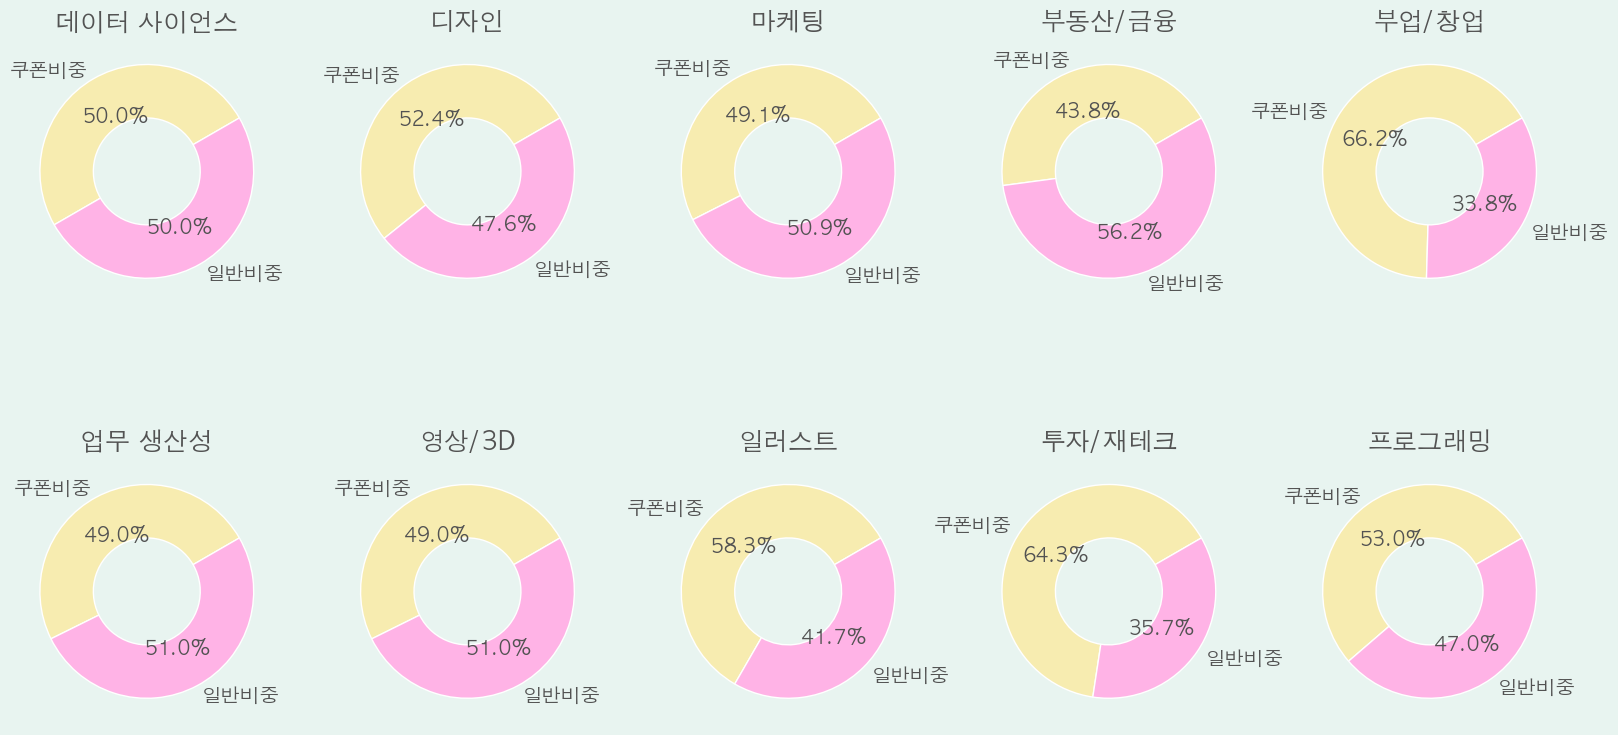

In [265]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']
count = 0

fig, axs = plt.subplots(2, 5, figsize=(20, 10), facecolor='#e8f4f0')

for i in range(0,2):
    for j in range(0,5):
        axs[i,j].pie(df_category[['쿠폰비중', '일반비중']].iloc[count],
                    labels=df_category.columns[3:5], autopct='%2.1f%%',
                    colors=colors, startangle=30, wedgeprops=dict(width=.5),
                    textprops={'fontsize': 14, 'color':font_color})
        axs[i,j].set_title(df_category.index[count], fontsize=18, color=font_color)
        # mpl.rcParams['font.size'] = 16
        count += 1


In [266]:
df_category_sum = pd.DataFrame({'쿠폰사용구매건': coupon_count.sum(), '일반구매건': pay_count.sum(),
                            '합계': coupon_count.sum()+pay_count.sum(), '쿠폰비중': coupon_count.sum()/pay_count.sum(),
                            '일반비중': 1-(coupon_count.sum()/pay_count.sum())}, index=['합계'])
df_category_sum

,쿠폰사용구매건,일반구매건,합계,쿠폰비중,일반비중
합계,76357,148009,224366,0.515894,0.484106


Text(0.5, 1.0, '쿠폰 사용 구매건 비중(전체)')

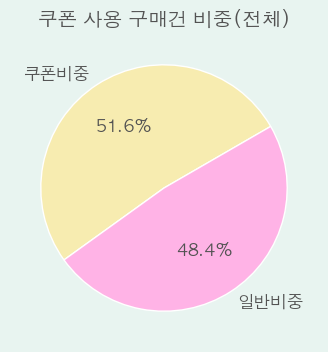

In [267]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']

# Create subplots and a pie chart
fig, ax = plt.subplots(figsize=(4, 4), facecolor='#e8f4f0')
ax.pie(df_category_sum[['쿠폰비중', '일반비중']].iloc[0], 
       labels=df_category_sum.columns[3:5], autopct='%2.1f%%', colors=colors, startangle=30,
       textprops={'fontsize': 12, 'color':font_color})
# Set title, its position, and font size
plt.title("쿠폰 사용 구매건 비중(전체)", fontsize=14, color=font_color)


## 카테고리별 Treemap
- 월별 실거래금액 합
- 유형:PAYMENT로 소팅했기 때문에 환불금액은 제외되어 있음

In [274]:
# import plotly.express as px
# fig = px.treemap(df_payment, path=['카테고리', '코스이름'], values='실거래금액')
# fig.update_layout(title_text='카테고리별 Tree Map')
# fig.show()

import plotly.express as px
fig = px.treemap(df_payment, path=['카테고리', '코스이름'], values='실거래금액')
fig.update_layout(title_text='카테고리별 Tree Map')
fig.update_traces(textfont_size=18)  # 원하는 텍스트 크기로 변경
fig.show()


## 카테고리별 lineplot
- 월별 실거래금액 합
- 유형:PAYMENT로 소팅했기 때문에 환불금액은 제외되어 있음

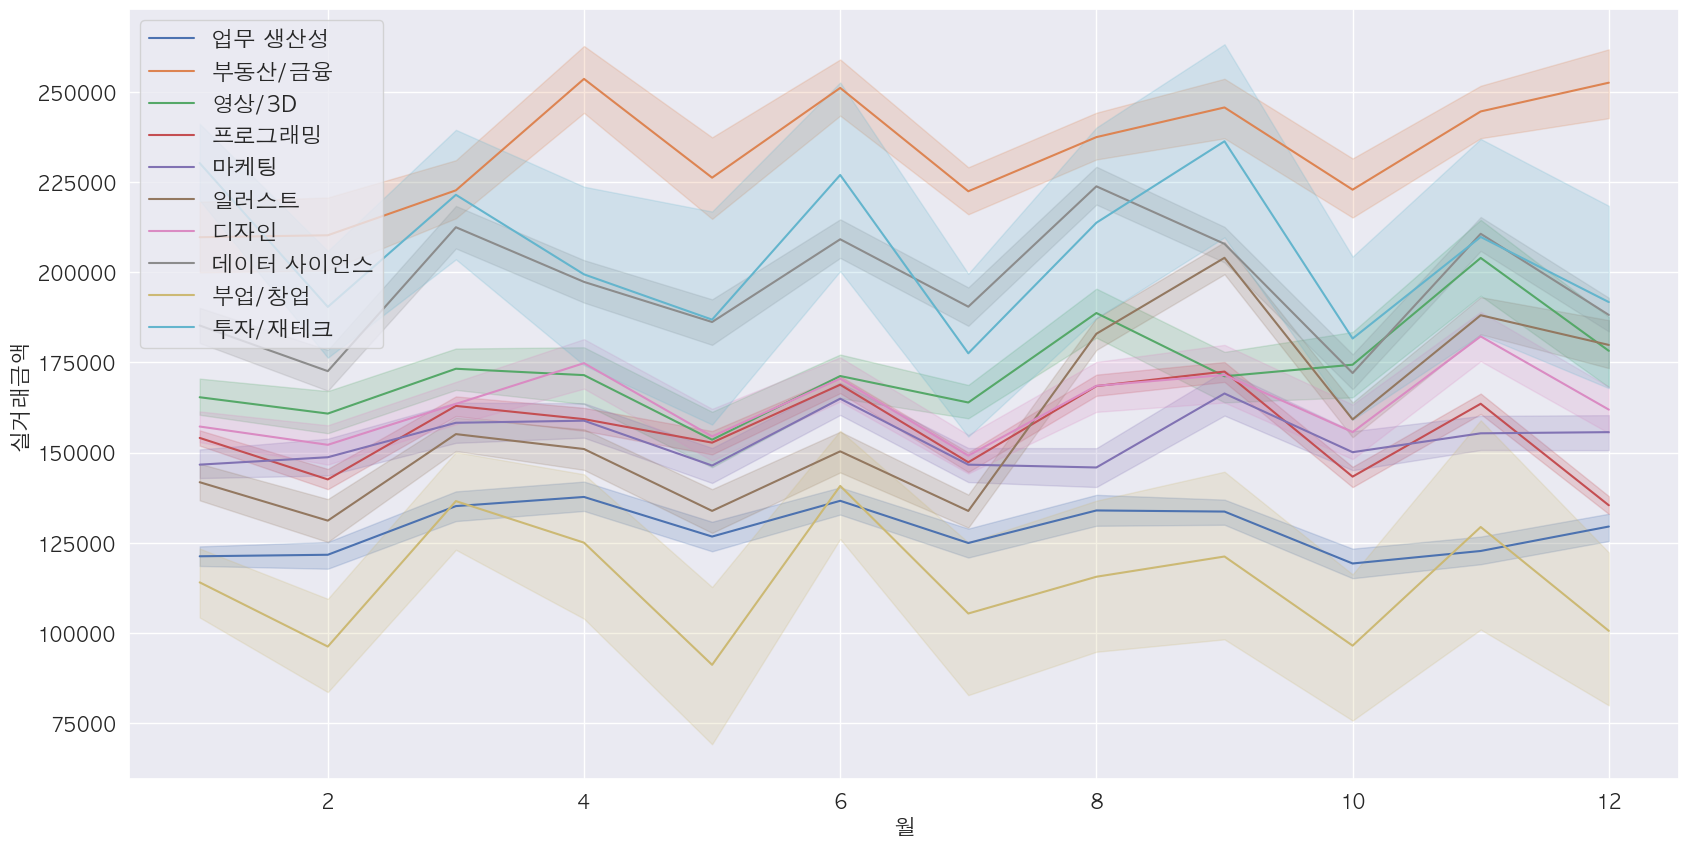

In [306]:
# fig, ax = plt.subplots(figsize=(20, 10))
# sns.lineplot(x="월", y="실거래금액", hue="카테고리", data=df_payment, ax=ax)
# plt.legend(fontsize='medium', loc='upper left')

# plt.show()

fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x="월", y="실거래금액", hue="카테고리", data=df_payment, ax=ax)

ax.set_xlabel("월", fontsize=16)  # Adjust x-axis label size
ax.set_ylabel("실거래금액", fontsize=16)  # Adjust y-axis label size
ax.tick_params(axis='y', labelsize=14)  # Adjust y-axis tick label size
ax.tick_params(axis='x', labelsize=14)  # Adjust x-axis tick label size

plt.legend(fontsize='medium', loc='upper left')
plt.show()


In [309]:
df_payment.groupby(by=['카테고리', '월'])['실거래금액'].sum()


카테고리      월 
데이터 사이언스  1     476626550
          2     346211450
          3     362084250
          4     343958750
          5     293656400
                  ...    
프로그래밍     8     665215184
          9     688665368
          10    611460158
          11    605271446
          12    746574540
Name: 실거래금액, Length: 120, dtype: int64

## 카테고리별 heatmap
- Value가 숫자인 항목만 포함

In [270]:
df_corr = df[['거래ID', '고객ID', '코스ID', '판매가격', '쿠폰할인액', '실거래금액', '환불금액', '월', '일']]
df_corr

,거래ID,고객ID,코스ID,판매가격,쿠폰할인액,실거래금액,환불금액,월,일
0,2417084,20053,209016,189000,0,159000,0,12,31
1,2415408,58309,210664,501000,0,501000,0,12,30
2,2413897,18075,211782,549000,0,549000,0,12,31
3,2413891,41898,213450,165000,30000,135000,0,12,31
4,2413887,94328,210773,239000,0,239000,0,12,31
...,...,...,...,...,...,...,...,...,...
159322,1551424,39658,204491,217000,10000,207000,0,1,1
159323,1551410,95136,206811,385000,0,385000,0,1,1
159324,1551361,12764,202927,166000,30000,136000,0,1,1
159325,1545070,19606,208104,289000,0,289000,0,1,2


In [271]:
df_corr = df_corr.corr().round(2)
df_corr

,거래ID,고객ID,코스ID,판매가격,쿠폰할인액,실거래금액,환불금액,월,일
거래ID,1.00,0.00,0.46,0.01,-0.04,0.03,-0.00,1.00,0.18
고객ID,0.00,1.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.01
코스ID,0.46,-0.00,1.00,0.01,-0.04,0.02,-0.01,0.45,0.09
판매가격,0.01,0.00,0.01,1.00,0.10,0.40,-0.12,0.01,0.01
쿠폰할인액,-0.04,0.00,-0.04,0.10,1.00,-0.36,0.15,-0.02,-0.23
실거래금액,0.03,-0.00,0.02,0.40,-0.36,1.00,0.68,0.02,0.15
환불금액,-0.00,-0.00,-0.01,-0.12,0.15,0.68,1.00,-0.01,0.02
월,1.00,0.00,0.45,0.01,-0.02,0.02,-0.01,1.00,0.10
일,0.18,-0.01,0.09,0.01,-0.23,0.15,0.02,0.10,1.00


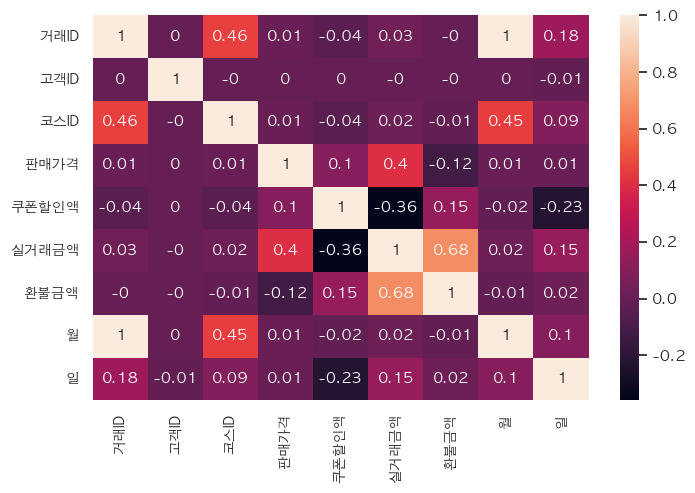

In [313]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df_corr, annot=True, annot_kws={"fontsize": 11}, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)  # Adjust x-axis tick label size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)  # Adjust y-axis tick label size
plt.show()

In [349]:
df[df['월'] == 12]
df.loc[df['월'] == 12, :]

,Unnamed: 0,거래ID,유형,고객ID,코스ID,사이트,포맷,카테고리,코스이름,거래일자,...,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,연,월,일,시
0,0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,...,189000,TRANSFER,159000,0,159000,0,2022,12,31,22
1,1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,...,501000,TRANSFER,501000,0,501000,0,2022,12,30,18
2,2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,...,549000,CARD,549000,0,549000,0,2022,12,31,23
3,3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,...,165000,CARD,135000,30000,135000,0,2022,12,31,23
4,4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,...,239000,CARD,239000,0,239000,0,2022,12,31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16340,16340,2313624,PAYMENT,97770,212600,FASTCAMPUS,올인원,일러스트,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,2022-12-01 00:12:04,...,280000,VBANK,280000,0,280000,0,2022,12,1,0
16341,16341,2313621,PAYMENT,87260,204097,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 13만 구독자 피피티프로젝트의 누구나 쉽게 배우는 시선강탈 피피티...,2022-12-01 00:12:50,...,141000,CARD,141000,0,141000,0,2022,12,1,0
16342,16342,2313611,PAYMENT,38863,213924,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 AWS 기반 아키텍처 설계와 DevOps,2022-12-01 00:12:21,...,189000,CARD,69000,120000,69000,0,2022,12,1,0
16343,16343,2313609,PAYMENT,74780,205143,FASTCAMPUS,RED,프로그래밍,The RED : 백엔드 에센셜 : 대용량 서비스를 위한 아키텍처 with Redi...,2022-12-01 00:12:46,...,285000,CARD,285000,0,285000,0,2022,12,1,0


In [ ]:
##